The BCI bears some resemblance to LTT plots.
* [phytools LTT](http://www.phytools.org/Cordoba2017/ex/11/LTT-and-gamma.html)
* [Luke's PCM book LTT](https://lukejharmon.github.io/pcm/chapter10_birthdeath/#section-10.6-lineage-through-time-plots)

Things to try still:
* MMs with different entropy values
* Get ipcoal working
 * Can parameterize with constant Ne or Ne informed by a distribution
* If we could get ipcoal to run on iBioGen model trees that would be very good.

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

%load_ext autoreload
%autoreload 2
import gzip
import joblib
import numpy as np
import os
import pandas as pd
import subprocess
from scipy.stats import entropy

import BCI

# Dev testing

In [13]:
data_dir = "/home/isaac/proj/IMEMEBA-BCI/MiSeq_SOP/{samp}.fastq"
data = data_dir.format(samp="F3D0_S188_L001_R1_001")
bci = BCI.BCI(data=data)
bci.run()

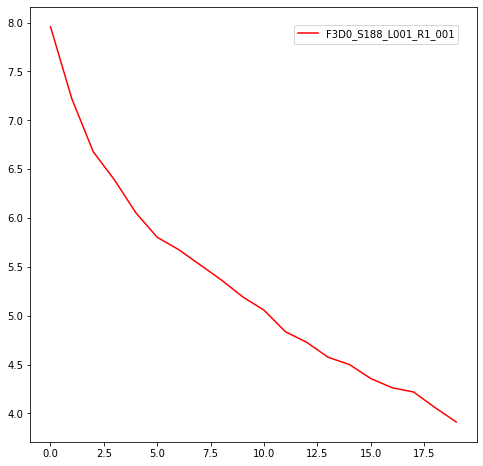

In [15]:
fig, ax = plt.subplots(figsize=(8,8))
fig, ax = bci.plot(ax=ax, log=True, normalize=False, color='red')


## Implement a disturbance

In [16]:
bci.transform(transformation="disturbance", fraction=0.5)
bci.run()
bci.transform(transformation="invasion", fraction=0.5)
bci.run()

## Plot all BCI treatments together

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

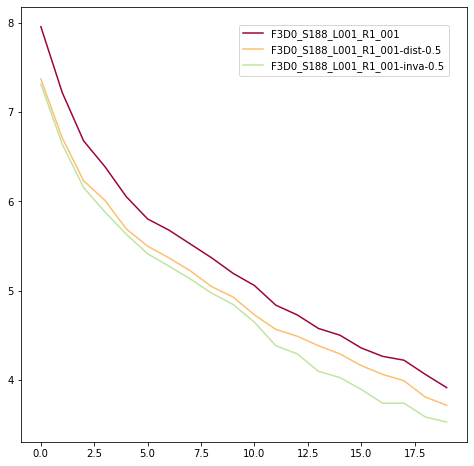

In [17]:
bci.plot_all(log=True, normalize=False)

## Compare 2 different samples

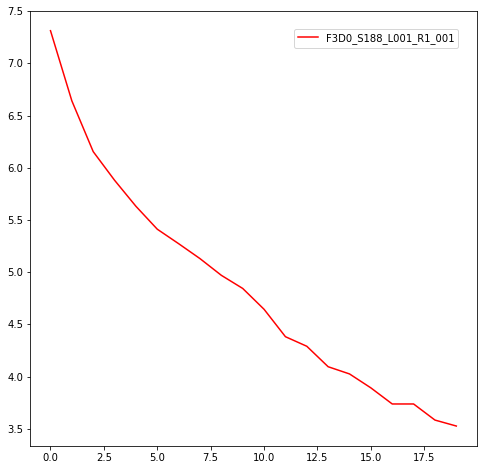

In [18]:
## Reset bci to it's raw state and plot it
bci.transform(transformation="raw")
fig, ax = plt.subplots(figsize=(8,8))
fig, ax = bci.plot(ax=ax, log=True, normalize=False, color='red')

In [19]:
# Run a new sample as bci2
data = data_dir.format(samp="F3D6_S194_L001_R2_001")
bci2 = BCI.BCI(data=data)
bci2.run()

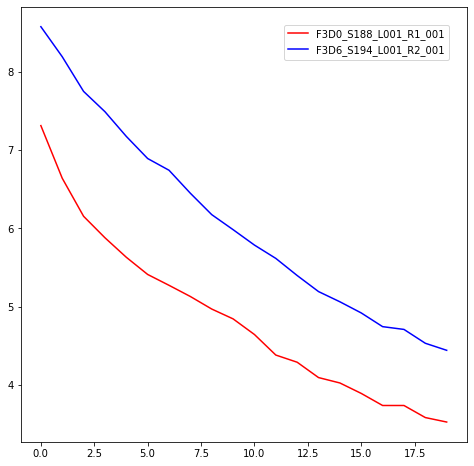

In [20]:
# Plot the new one on the original axes
fig, ax = bci2.plot(ax=ax, log=True, normalize=False, color='blue')
fig

In [245]:
bci3 = BCI.BCI(data="/home/isaac/proj/IMEMEBA/MMs/T_Aquatic/T_Aquatic.fasta")
bci3.run()

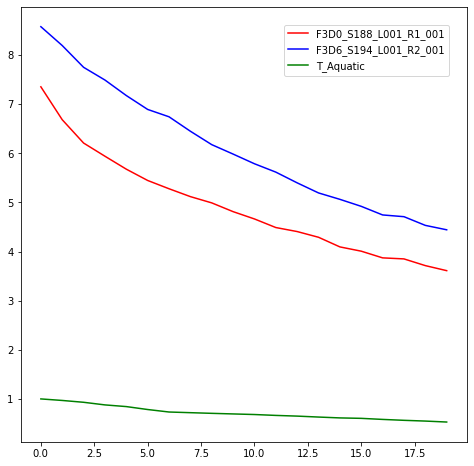

In [246]:
fig, ax = bci3.plot(ax=ax, color="green")
fig

# Prototyping

In [116]:
samp = "F3D0_S188_L001_R1_001"
data = "/home/isaac/proj/IMEMEBA/MiSeq_SOP/{samp}.fastq".format(samp=samp)
tols = np.linspace(99, 80, 20)/100
tmpdir = f"./.tmpdir-{samp}"
if not os.path.exists(tmpdir):
    os.mkdir(tmpdir)
cmds = []
seed_files = []
for tol in tols:
    sampstr = samp+str(tol)
    cmd = ["vsearch",
               "-cluster_smallmem", f"{data}",
               "-strand", "plus",
               "-id", f"{tol}",
               "-userout", f"{tmpdir}/{sampstr}.utmp",
               "-userfields", "query+target+id+gaps+qstrand+qcov",
               "-maxaccepts", "1",
               "-maxrejects", "0",
               "-notmatched", f"{tmpdir}/{sampstr}.htmp",
               "-fasta_width", "0",
               "-fulldp",
               "-usersort"]
    cmds.append(' '.join(cmd))
    seed_files.append(f"{tmpdir}/{sampstr}.htmp")
print(len(cmds))

20


In [115]:
results = joblib.Parallel(n_jobs=20)(joblib.delayed(systemcall)(f) for f in cmds)
asvs = sorted([len(open(x).readlines()) for x in seed_files], reverse=True)

In [189]:
import random
with open(bci.data, 'r') as infile:
    with open(bci.tmpdir+"/wat.txt", 'w') as outfile:
        pairdealer = zip(*[iter(infile)] * 4)

        invader = next(pairdealer)
        print(invader)
        for x in pairdealer:
            if random.random() < 0.5:
                outfile.write(''.join(x))

    

('@M00967:43:000000000-A3JHG:1:1101:18327:1699 1:N:0:188\n', 'NACGGAGGATGCGAGCGTTATCCGGATTTATTGGGTTTAAAGGGTGCGTAGGCGGCCTGCCAAGTCAGCGGTAAAATTGCGGGGCTCAACCCCGTACAGCCGTTGAAACTGCCGGGCTCGAGTGGGCGAGAAGTATGCGGAATGCGTGGTGTAGCGGTGAAATGCATAGATATCACGCAGAACCCCGATTGCGAAGGCAGCATACCGGCGCCCTACTGACGCTGAGGCACGAAAGTGCGGGGATCAAACAG\n', '+\n', '#>>AABABBFFFGGGGGGGGGGGGGGGGHHHHHHHGGGHHHHHGHGGGGGGGHGGGGGGHHHHHHHHHHGGGGGHHHHGHGGGGGGHHBGHGDGGGGGHHHGGGGHHHHHHHHGGGGGHG@DHHGHEGGGGGGBFGGEGGGGGGGG.DFEFFFFFFFDCFFFFFFFFFFFFFFFFFFFFFFFFFFDFDFFFEFFCFF?FDFFFFFFFFAFFFFFFFFFFFBDDFFFFFEFADFFFFFBAFFFA?EFFFBFF\n')


In [206]:
bci.transform(transformation="invasion")
bci.run()

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

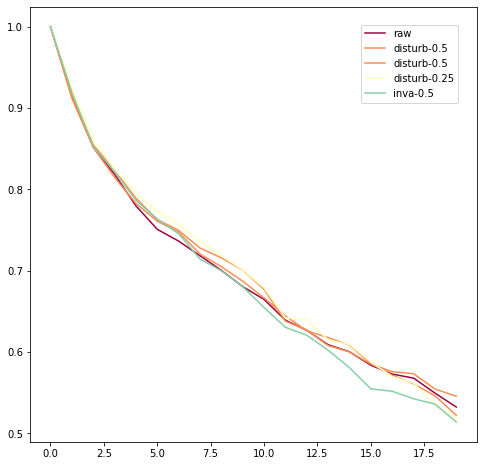

In [209]:
bci.plot_all(normalize=True)